\begin{center} 
Chun-Yuan (Scott) Chiu 
\end{center}
\begin{center} 
chunyuac@andrew.cmu.edu 
\end{center}

# 1. {-}

## (a) {-}

In [1]:
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

# data = pd.read_csv('http://rosmarus.refsmmat.com/datasets/datasets/nutrition/sr28_ABBREV.csv', index_col=0)

fulldata = pd.read_csv('sr28_ABBREV.csv', index_col=0).dropna()
data = fulldata[['Energ_Kcal', 'Protein', 'Lipid_Tot', 'Carbohydrt', 'Fiber_TD', 'Sugar_Tot', 'Cholestrl']]
scaled_data = scale(data)

fulldata['Cluster'] = KMeans(n_clusters=5).fit_predict(scaled_data)
fulldata[['Shrt_Desc', 'Cluster']][3:39]

,Shrt_Desc,Cluster
NDB_No,,
1004,"CHEESE,BLUE",2
1005,"CHEESE,BRICK",2
1006,"CHEESE,BRIE",2
1007,"CHEESE,CAMEMBERT",2
1009,"CHEESE,CHEDDAR",2
1011,"CHEESE,COLBY",2
1012,"CHEESE,COTTAGE,CRMD,LRG OR SML CURD",1
1013,"CHEESE,COTTAGE,CRMD,W/FRUIT",1
1014,"CHEESE,COTTAGE,NONFAT,UNCRMD,DRY,LRG OR SML CURD",1


In [8]:
import hvplot.pandas
from pandas import DataFrame
# import matplotlib.pyplot as plt

columns = data[3:39].columns
index = data[3:39].index

DataFrame(scaled_data[3:39], columns=columns, index=index).hvplot()   #.hvplot()
# plt.show()

:NdOverlay   [Variable]
   :Curve   [NDB_No]   (value)

## (b) {-}

Recall that 
\begin{align*}
W_K &= \min_{C, c_1, \ldots, c_K \in \mathbb R^p}\sum_{k=1}^K\sum_{C(i)=k}\lVert X_i - c_k \rVert_2^2, \\
W_{K+1} &= \min_{C, c_1, \ldots, c_K, c_{K+1} \in \mathbb R^p}\sum_{k=1}^{K+1}\sum_{C(i)=k}\lVert X_i - c_k \rVert_2^2. 
\end{align*}
Thus $W_K$ is the solution of the same optimization problem as $W_{K+1}$ but with one more constraint $c_K = c_{K+1}$. 
With this extra constraint, to find $W_K$ is to search the minimum in a solution space that is a subspace of $W_{K+1}$'s, so $W_K > W_{K+1}$.

## (c) {-}

Judging from the below figure, $W_K$ reduces significantly slower after $K=13$ or so. 

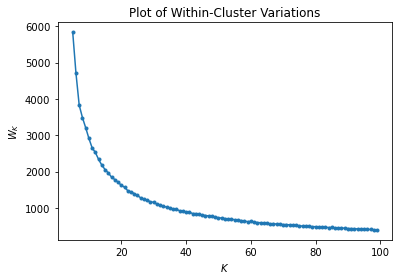

In [10]:
import matplotlib.pyplot as plt
from pandas import Series

ax = DataFrame([(K, KMeans(n_clusters=K).fit(scaled_data).inertia_) for K in range(5, 100)], columns=['K', 'W_K']).set_index('K').plot(style='.-', legend=None)
ax.set(xlabel='$K$', ylabel='$W_K$', title='Plot of Within-Cluster Variations')
plt.show()

## (d) {-}

In [4]:
columns = data.columns
index = data.index

param = DataFrame(scaled_data, columns=columns, index=index).describe().loc[['min', 'max']].T
param['scale'] = param['max'] - param['min']
param['loc'] = param['min']
param = param.T
param

,Energ_Kcal,Protein,Lipid_Tot,Carbohydrt,Fiber_TD,Sugar_Tot,Cholestrl
min,-1.329702,-1.135006,-0.707750,-0.712014,-0.437762,-0.488167,-0.391996
max,4.358324,6.420071,6.262388,3.345421,12.776493,6.298725,28.390654
scale,5.688026,7.555077,6.970139,4.057435,13.214255,6.786892,28.782650
loc,-1.329702,-1.135006,-0.707750,-0.712014,-0.437762,-0.488167,-0.391996


In [5]:
from scipy.stats import uniform
import numpy as np

np.random.seed(0)
null_data = np.array([uniform.rvs(
                        loc=param[feature]['loc'], 
                        scale=param[feature]['scale'], 
                        size=len(fulldata)) for feature in param]).T

In [64]:
DataFrame(null_data).describe().loc[['min', 'max']]

,0,1,2,3,4,5,6
min,-1.329408,-1.127490,-0.702405,-0.711700,-0.433565,-0.487475,-0.378400
max,4.349794,6.415343,6.260896,3.345415,12.773647,6.298198,28.356693
